In [2]:
import numpy as np
import scipy.stats as sts
import scipy.special as sc
import matplotlib.pyplot as plt
import random as rng
from statsmodels.distributions.empirical_distribution import ECDF
# import seaborn
%matplotlib inline

In [3]:
# Lab 1. Статистическая обработка одномерной выборки
# N варианта 5

# !!! НАПИСАТЬ РУЧКАМИ В ВОРДЕ

In [4]:
# 1
V = [4 , 9 , 6 , 7 , 10 , 
     6 , 8 , 3 , 8 , 7 , 
     1 , 3 , 10 , 10 , 6 , 
     8 , 8 , 9 , 6 , 8 , 
     7 , 7 , 8 , 7 , 10 , 
     7 , 5 , 9 , 8 , 4 , 
     8 , 11 , 4 , 10 , 9 , 
     12 , 12 , 4 , 4 , 5 , 
     6 , 7 , 5 , 4 , 7 , 
     6 , 6 , 4 , 8 , 5]
print(len(V))

# Вариационный ряд
print(sorted(V))
# Размах выборки
w = max(V) - min(V)
print(f'Размах выборки: {w}')


50
[1, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 12, 12]
Размах выборки: 11


In [5]:
# Статистический ряд
print(f"\nЗначение    |", end='')
for n in set(sorted(V)):
    print(f' {n:4} ', end='|')

print(f"\nЧастота n_i |", end='')
frequencies = dict()
for n in sorted(V):
    if n in frequencies:
        frequencies[n] += 1
    else:
        frequencies[n] = 1
        print(f' {V.count(n):4} ', end='|')

print(f" - Проверка :", end='')
for i in frequencies.keys():
    print(f" {frequencies[i]} +", end='')
print(f" = {sum(frequencies[i] for i in frequencies.keys())}", end='')

print(f"\nОтн.Ч-та n_i|", end='')
frequencies = dict()
for n in sorted(V):
    if n in frequencies:
        frequencies[n] += 1
    else:
        frequencies[n] = 1
        print(f' {V.count(n)/len(V):4} ', end='|')

print(f" - Проверка :", end='')
for i in frequencies.keys():
    print(f" {frequencies[i] / len(V)} +", end='')
print(f" = {sum(frequencies[i] for i in frequencies.keys()) // len(V)}", end='')




Значение    |    1 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |
Частота n_i |    1 |    2 |    7 |    4 |    7 |    8 |    9 |    4 |    5 |    1 |    2 | - Проверка : 1 + 2 + 7 + 4 + 7 + 8 + 9 + 4 + 5 + 1 + 2 + = 50
Отн.Ч-та n_i| 0.02 | 0.04 | 0.14 | 0.08 | 0.14 | 0.16 | 0.18 | 0.08 |  0.1 | 0.02 | 0.04 | - Проверка : 0.02 + 0.04 + 0.14 + 0.08 + 0.14 + 0.16 + 0.18 + 0.08 + 0.1 + 0.02 + 0.04 + = 1

In [6]:
# Группированная выборка
multiples_w = [d for d in range(1, w + 1) if w % d == 0]
#print(f"Множители размаха выборки (как варианты интервала разбиения): {multiples_w}")
#delta = rng.choice(multiples_w[0:-1])
#split_num = w // delta
split_num = 7
delta = w / split_num


print(f"\nПромежутки |", end='')
for i in range(split_num - 1):
    print(f"  [{min(V) + delta * i:2.2}; {min(V) + delta * (i + 1):2.3})|", end='')
print(f" [{min(V) + delta * split_num - delta:2.3}; {min(V) + delta * split_num:2.3}]|", end='')

fs = len(f"[{min(V) + delta * split_num - delta:2.2}; {min(V) + delta * split_num:2.3}]") - 2
frequencies = list()
print(f"\nЧастота    |", end='')
for i in range(split_num - 1):
    frequencies.append(len([j for j in V if (min(V) + delta * i <= j < min(V) + delta * (i + 1))]))
    print(f" {frequencies[-1]:{fs}} |", end='')
frequencies.append(len([i for i in V if (min(V) + delta * split_num - delta <= i <= min(V) + delta * split_num)]))
print(f" {frequencies[-1]:{fs}} |", end='')

print(f"\nОтн. Ч-та  |", end='')
for i in range(split_num - 1):
    print(f" {len([j for j in V if (min(V) + delta * i <= j < min(V) + delta * (i + 1))])/len(V):{fs}} |", end='')
print(f" {len([i for i in V if (min(V) + delta * split_num - delta <= i <= min(V) + delta * split_num)]):{fs}} |", end='')




Промежутки |  [1.0; 2.57)|  [2.6; 4.14)|  [4.1; 5.71)|  [5.7; 7.29)|  [7.3; 8.86)|  [8.9; 10.4)| [10.4; 12.0]|
Частота    |           1 |           9 |           4 |          15 |           9 |           9 |           3 |
Отн. Ч-та  |        0.02 |        0.18 |        0.08 |         0.3 |        0.18 |        0.18 |           3 |

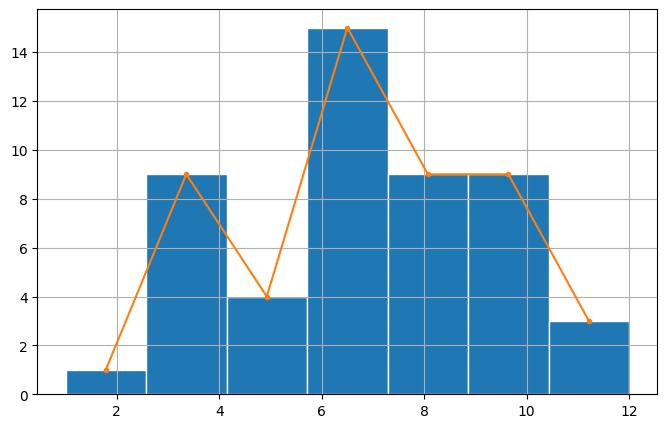

In [7]:
counts, bins = np.histogram(sorted(V), 7)
plt.figure(figsize=(8, 5))
# plt.hist(bins[:-1], bins, weights=counts, edgecolor='#ffffff')

plt.hist(V, bins=split_num, edgecolor="#ffffff", density=False)
delta_x = [((split_num - 1) / 2 - i) * (w / split_num) / (split_num - 1) for i in range(split_num)]
plt.plot(np.linspace(1, 12, 7) + delta_x, frequencies, marker='.')
plt.grid()

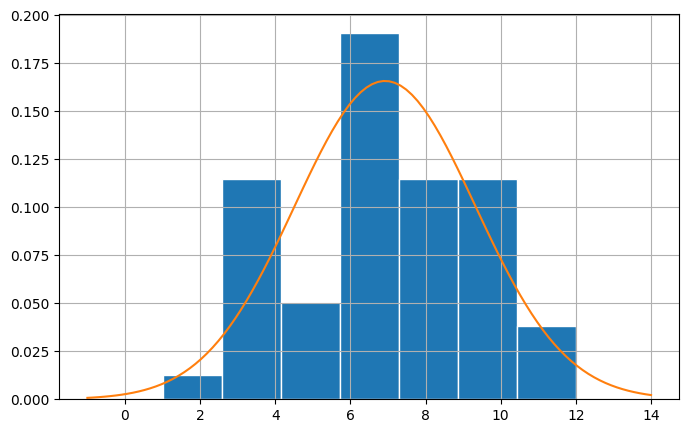

In [8]:
counts, bins = np.histogram(sorted(V), 7)
plt.figure(figsize=(8, 5))
# plt.hist(bins[:-1], bins, weights=counts, edgecolor='#ffffff')

plt.hist(V, bins=split_num, edgecolor="#ffffff", density=True)
x_t = np.linspace(min(V) - 2, max(V) + 2, 100)
y_t = sts.norm.pdf(x_t, np.mean(V), np.std(V))
plt.plot(x_t, y_t)
plt.grid()

In [9]:
# Группированная выборка
split_num = 7
delta = w / split_num

print(f"\nПромежутки |", end='')
for i in range(split_num - 1):
    print(f"  [{min(V) + delta * i:2.2}; {min(V) + delta * (i + 1):2.3})|", end='')
print(f" [{min(V) + delta * split_num - delta:2.3}; {min(V) + delta * split_num:2.3}]|", end='')

fs = len(f"[{min(V) + delta * split_num - delta:2.2}; {min(V) + delta * split_num:2.3}]") - 2

print(f"\nСередина   |", end='')
for i in range(split_num - 1):
    print(f"{min(V) + delta * i + delta / 2:{fs + 1}.{4}} |", end='')
print(f"{min(V) + delta * split_num - delta / 2:{fs + 1}.5} |", end='')

frequencies = list()
print(f"\nЧастота    |", end='')
for i in range(split_num - 1):
    frequencies.append(len([j for j in V if (min(V) + delta * i <= j < min(V) + delta * (i + 1))]))
    print(f" {frequencies[-1]:{fs}} |", end='')
frequencies.append(len([i for i in V if (min(V) + delta * split_num - delta <= i <= min(V) + delta * split_num)]))
print(f" {frequencies[-1]:{fs}} |", end='')

print(f"\nНакоп. Ч-та|", end='')
for i in range(split_num - 1):
    print(f" {sum(frequencies[j] for j in range(i + 1)):{fs}} |", end='')
print(f" {sum(frequencies):{fs}} |", end='')

print(f"\nОтн. Ч-та  |", end='')
for i in range(split_num - 1):
    print(f" {len([j for j in V if (min(V) + delta * i <= j < min(V) + delta * (i + 1))])/len(V):{fs}} |", end='')
print(f" {len([i for i in V if (min(V) + delta * split_num - delta <= i <= min(V) + delta * split_num)]):{fs}} |", end='')

print("\nСмещ. Дисп.|", end='')
for i in range(split_num - 1):
    temp_nums = [j for j in V if min(V) + delta * i <= j < min(V) + delta * (1 + i)]
    sr = sum(temp_nums) / len(temp_nums)
    print(f" {sum( (j - sr)**2 for j in temp_nums) / len(temp_nums):{fs}.3} |", end='')
temp_nums = [j for j in V if min(V) + delta * 6 <= j <= min(V) + delta * (1 + 6)]
sr = sum(temp_nums) / len(temp_nums)
print(f" {sum( (j - sr)**2 for j in temp_nums) / len(temp_nums):{fs}.3} |", end='')

print("\nМода       |", end='')
for i in range(split_num):
    temp_nums = [j for j in V if min(V) + delta * i <= j < min(V) + delta * (1 + i)]
    print(f"{sts.mode(temp_nums).mode:{fs + 1}} |", end='') 

print("\nМедиана    |", end='')
for i in range(split_num):
    temp_nums = [j for j in V if min(V) + delta * i <= j < min(V) + delta * (1 + i)]
    print(f"{np.median(temp_nums):{fs + 1}} |", end='')




Промежутки |  [1.0; 2.57)|  [2.6; 4.14)|  [4.1; 5.71)|  [5.7; 7.29)|  [7.3; 8.86)|  [8.9; 10.4)| [10.4; 12.0]|
Середина   |       1.786 |       3.357 |       4.929 |         6.5 |       8.071 |       9.643 |      11.214 |
Частота    |           1 |           9 |           4 |          15 |           9 |           9 |           3 |
Накоп. Ч-та|           1 |          10 |          14 |          29 |          38 |          47 |          50 |
Отн. Ч-та  |        0.02 |        0.18 |        0.08 |         0.3 |        0.18 |        0.18 |           3 |
Смещ. Дисп.|         0.0 |       0.173 |         0.0 |       0.249 |         0.0 |       0.247 |       0.222 |
Мода       |           1 |           4 |           5 |           7 |           8 |          10 |          11 |
Медиана    |         1.0 |         4.0 |         5.0 |         7.0 |         8.0 |        10.0 |        11.0 |

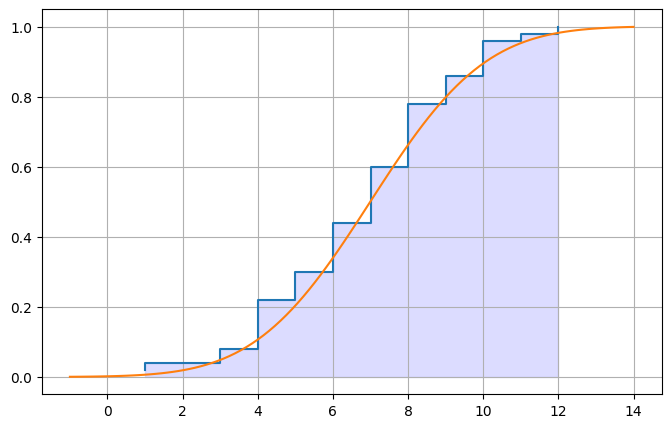

In [10]:
# fill_between для ф-ции распределения
plt.figure(figsize=(8, 5))

ecdf = ECDF(V)
plt.fill_between(ecdf.x, ecdf.y, color='#bbbbff', step='pre', alpha=.5)
plt.step(ecdf.x, ecdf.y)

x_t = np.linspace(min(V) - 2, max(V) + 2, 100)
y_t = sts.norm.pdf(x_t, np.mean(V), np.std(V))
y_s = []
for _ in range(len(y_t)): 
    y_s.append(sum(y_t[i] / sum(y_t) for i in range(_)))
plt.plot(x_t, y_s)

plt.grid()

In [16]:
frequencies = dict()
for n in sorted(V):
    if n in frequencies:
        frequencies[n] += 1
    else:
        frequencies[n] = 1

print(f"Медиана : {np.median(V)}\n" +
      f"Мода: {sts.mode(V).mode}\n" +
      f"Мат. Ожидание : {sum(i * frequencies[i] / len(V) for i in set(V))}\n" +
      f"Дисперсия : {sum(i * i * frequencies[i] / len(V) for i in set(V)) - sum(i * frequencies[i] / len(V) for i in set(V))**2}")

Медиана : 7.0
Мода: 8
Мат. Ожидание : 6.92
Дисперсия : 5.793599999999998


In [18]:
sts.t.__doc__

'A Student\'s t continuous random variable.\n\n    For the noncentral t distribution, see `nct`.\n\n    As an instance of the `rv_continuous` class, `t` object inherits from it\n    a collection of generic methods (see below for the full list),\n    and completes them with details specific for this particular distribution.\n    \n    Methods\n    -------\n    rvs(df, loc=0, scale=1, size=1, random_state=None)\n        Random variates.\n    pdf(x, df, loc=0, scale=1)\n        Probability density function.\n    logpdf(x, df, loc=0, scale=1)\n        Log of the probability density function.\n    cdf(x, df, loc=0, scale=1)\n        Cumulative distribution function.\n    logcdf(x, df, loc=0, scale=1)\n        Log of the cumulative distribution function.\n    sf(x, df, loc=0, scale=1)\n        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).\n    logsf(x, df, loc=0, scale=1)\n        Log of the survival function.\n    ppf(q, df, loc=0, scale=1)\n        